In [1]:
from IPython.display import display

import itertools
from matplotlib import pyplot as plt
import numpy as np
import os
import scipy
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")


In [2]:
train_obj = pd.read_csv('output/training_objective.csv').set_index('scenario')
train_obj['dataset'] = 'training'
test_obj = pd.read_csv('output/test_objective.csv').set_index('scenario')
test_obj['dataset'] = 'test'
obj = pd.concat([train_obj, test_obj], axis='rows')



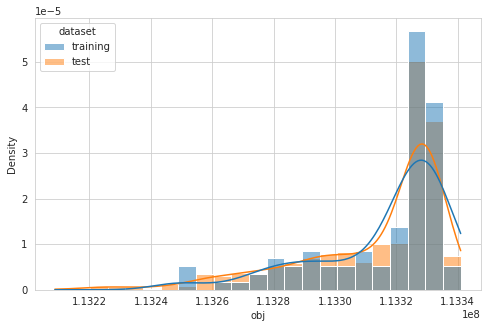

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(obj, x='obj', hue='dataset', stat='density', common_norm=False, kde=True)
plt.savefig('output/obj_distribution.pdf')

In [4]:
obj.groupby('dataset')['obj'].describe()

,count,mean,std,min,25%,50%,75%,max
dataset,,,,,,,,
test,900.0,1.133128e+08,24362.313304,1.132087e+08,1.133004e+08,1.133248e+08,1.133297e+08,1.133410e+08
training,101.0,1.133160e+08,21492.203705,1.132490e+08,1.133078e+08,1.133257e+08,1.133301e+08,1.133395e+08


In [5]:
scipy.stats.levene(test_obj['obj'], train_obj['obj'], center='median')

LeveneResult(statistic=1.4598956843607407, pvalue=0.22723265125922917)

In [6]:
scipy.stats.ttest_ind(test_obj['obj'], train_obj['obj'])

Ttest_indResult(statistic=-1.2656438748239942, pvalue=0.20593570087326601)